**Tokyo Airbnb Analysis**

Airbnb is becoming more and more popular for young travelers. Compared to traditional hotels, Airbnb travelers would have the opportunity to live in a space like home and interact with the local host for better travel tips. In Tokyo, the standard hotels (non hostel or high-end hotel) in the city would usually charge 16000 Japanese Yen ($160) for a double room per night with very limited space, which is more expensive than living in Airbnb with the same feature. The purpose of this analysis is to help the Airbnb users to navigate a place that could make the most of the value but not spend too much money, especially for whoever is not familiar with Tokyo. 

Link to the raw data: https://drive.google.com/file/d/1u9lwFPuKCtdqxiUULKnBRTWvFHInAp3I/view?usp=sharing

After browsing through one year length of the Airbnb data in Tokyo Prefecture from March 2019 to February 2020, I would like to focus on district (neighborgood cleansed), neighborhood (zipcode) which are the factors driving the price differently. Also, I would like to break into 2 types of travel by room type: comfort travel (entire unit and private room) and budget travel (shared room with others). 

(1) Top 10 districts for comfort travel and Top 10 dstricts for budget travel:

I used past customer's review ratings (overall, value, location, etc) as the standards to determine whether it is a good district. Also, I would need to see the number of listings because some districts with excellent rating only have about 10 listings. Therefore, I set the benchmark of # listing based on the median number for both travel type, as well as the ratings. With such benchmark as the filter, I made the Top 10 districts for both types of travel, including the average price, # listing and a couple of important ratings. 

(2) Total of 6 boxplots for Top 3 districts of both types of travel along the year:

The data spans for 1 year so that the price can vary on different months. These boxplots for 12 months I made can reflect the change of the price along a year with median, high bound, low bound. The customers can have a sense of how the price can fluctuate along the year for better planning.

(3) Top 10 Ideal Neighborhood by Zipcode for Comfort Travel and for Budget Travel:  

Each district would have many neighborhoods with different zipcode. Some very nice district might have a lower overall rating due to a couple of bad neighborhood. If the customers don't mind which district they would end up living in, narrowing down to zipcode neighborhood can actually help nagivate the listing with better ratings. The filter is done in the same methods as for the district. With the top recommended neighborhood zipcodes, the customer can also doublecheck the safety by looking up with the zipcode in Tokyo crime map.

(4) Available Neighborhood in Top 8 Tourist Spot:

By using webscrapping function, I extracted the top 8 tourist spots with ther zipcode. Then, I queried the database and see if there are any listings within that zipcode which is right next to the tourist spot. Unfortuately, the listings are not available in all these zipcodes, but fairly enough get 4. 

(5) Top 20 Hosts in Tokyo with worry free:

In Tokyo, hosts with many listings are typically operating as a company. They would have different locations/districts available in the city. By navigating Top 20 hosts, people can simply go to their page and see where they can stay. Best rating hosts would always create a great stay experience for the travelors. Also, travelors might want to reach out to the hosts for better travel guidance and even assistance. These hosts would usually fulfill their needs. In this case, I would highly weight on the communication, and overall experience. 

(6) Correlation to Price:

The correlation function can only check the numerical parameters. Thus, I tested how # bedroom, # bathroom, # bed, how many guests can stay, price for extra guest, and overall rating can contribute to the price. The result shows the very low correlation. Thus, I would move on without considering about these factors too much.

(6) T-Test for 2 hypothesis:

I want to see whether the cancellation policy and whether the host is a superhost can make a significant impact on the price. I broke both hypothesis into 2 groups like A/B Test, and check the p-value. The result shows the cancellation policy does make an impact, but whether superhost would not. This would help the customer pay attention to the cancellation policy, for example, if they are very solid about their travel plan, they can choose the one with strict cancellation policy to receive a better price. Also, travelor can choose superhost as possible since they won't affect the price that much. 

In conclusion, travelers would be able to determine which districts and neighborhoods are the "most ideal" for them by seeing the ratings, the # listing and the average price. They can also access to the crime map to verify the nearby safety before making a decision. A map of Tokyo would be also given with tourist spot pinned in, travelor would have a good sense about where the district. Also, the top host list would be another idea to help travelors especially those don't have preference on district to find a worry-free listing, since the host have perfect ratings, the locations and other ratings would be good as well. The correlation test and t-test can tell the travelors neighborhood, district and cancellation policy are the main factors driving the price. 

In [ ]:
# access to csv file in Google Drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)


Mounted at /content/gdrive


In [ ]:
# Import pandas and read in our GDrive-mounted csv

import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set()

df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/TokyoAirbnbListings.csv', encoding = 'unicode_escape')


In [ ]:
rawdata = df.dropna()


**Data Overview and Browsing**

The information below is just for me to take a brief look of the data in order to make a clearer direction for the next step. For example, I would be able to see how many listings in each neighborhood, how the ratings in each neighborhood, then determine the benchmark for the filters, etc.

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110580 entries, 3 to 151069
Data columns (total 60 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            110580 non-null  int64  
 1   host_id                                       110580 non-null  int64  
 2   host_since                                    110580 non-null  object 
 3   host_response_time                            110580 non-null  object 
 4   host_response_rate                            110580 non-null  object 
 5   host_is_superhost                             110580 non-null  object 
 6   host_neighbourhood                            110580 non-null  object 
 7   host_listings_count                           110580 non-null  float64
 8   host_total_listings_count                     110580 non-null  float64
 9   host_verifications                            11

In [ ]:
#Pivot Table for Average Price in different district with different room types. Price unit is Japanese Yen.

district_price_pivot = pd.pivot_table(rawdata, values = 'price', index=['neighbourhood_cleansed'], columns=['room_type'], aggfunc=np.mean, fill_value=0)
district_price_pivot = district_price_pivot.round(-2)
district_price_pivot = district_price_pivot.rename(columns={'Entire home/apt':'Entire unit'})
district_price_pivot = district_price_pivot[['Entire unit','Private room','Shared room']]
#For better privacy and space, it would be ideal to stay in the entire unit or at least private room.
#Entire unit: Sort the price from high to low 
district_price_pivot.sort_values(by=['Entire unit', 'Private room'], ascending=False)


room_type,Entire unit,Private room,Shared room
neighbourhood_cleansed,,,
Hachioji Shi,385900.0,3700.0,0.0
Chiyoda Ku,108800.0,20800.0,4000.0
Chuo Ku,34900.0,8900.0,8700.0
Nishitokyo Shi,33000.0,0.0,0.0
Edogawa Ku,30800.0,6800.0,3600.0
Taito Ku,28600.0,11100.0,3700.0
Komae Shi,26300.0,4200.0,0.0
Minato Ku,25400.0,9500.0,6100.0
Shinagawa Ku,22600.0,7900.0,3000.0


In [ ]:
#Value Rating:
rating_pivot = pd.pivot_table(rawdata, values = ['review_scores_rating','review_scores_value','review_scores_accuracy','review_scores_cleanliness', 'review_scores_location'],
                              index=['neighbourhood_cleansed'], aggfunc=np.mean, fill_value=0)
rating_pivot = rating_pivot.rename(columns={'review_scores_rating':'Overall','review_scores_accuracy':'Accuracy','review_scores_cleanliness':'Cleanliness',
                      'review_scores_location':'Location','review_scores_value':'Value'})
rating_pivot = rating_pivot.round(1)
rating_pivot = rating_pivot.sort_values(by=['Overall', 'Value'], ascending=False)
rating_pivot = rating_pivot[['Overall','Value','Location','Cleanliness','Accuracy']]
rating_pivot

,Overall,Value,Location,Cleanliness,Accuracy
neighbourhood_cleansed,,,,,
Nishitokyo Shi,100.0,10.0,10.0,10.0,10.0
Kokubunji Shi,98.0,10.0,9.0,10.0,9.0
Akishima Shi,97.5,8.0,9.0,9.0,9.0
Komae Shi,95.6,10.0,9.4,10.0,9.7
Meguro Ku,94.6,9.4,9.6,9.4,9.7
Chuo Ku,94.2,9.3,9.6,9.7,9.7
Setagaya Ku,94.2,9.3,9.6,9.5,9.7
Ota Ku,94.1,9.5,9.1,9.6,9.7
Arakawa Ku,93.9,9.4,9.4,9.5,9.7


Most popular districts with overall and location rating. Top 10

In [ ]:
heatdistrict_pivot = pd.pivot_table(rawdata, values = ['id','review_scores_rating','review_scores_value'],
                              index=['neighbourhood_cleansed'], aggfunc={'id':'count','review_scores_rating':'mean','review_scores_value':'mean'})

heatdistrict_pivot = heatdistrict_pivot.rename(columns={'review_scores_rating':'Overall','review_scores_value':'Value','id':'# Listings' })

heatdistrict_pivot = heatdistrict_pivot.round(1)
heatdistrict_pivot1 = heatdistrict_pivot.sort_values(by=['# Listings', 'Overall'], ascending=False)

heatdistrict_pivot1[0:10]

,# Listings,Overall,Value
neighbourhood_cleansed,,,
Shinjuku Ku,20240,91.4,9.1
Taito Ku,14021,93.2,9.3
Toshima Ku,13119,90.9,9.1
Sumida Ku,8870,92.8,9.3
Shibuya Ku,8831,91.9,9.0
Ota Ku,5847,94.1,9.5
Minato Ku,4930,93.1,9.1
Chuo Ku,3756,94.2,9.3
Nakano Ku,3393,93.8,9.3


**Top District Section by travel type (room type)**

(1) Top 10 Popular Districts in Tokyo with Above Average Rating and Value

(2) Top 10 Districts for Comfort Travel

(3) Top 10 Districts for Budget Travel

Note: Due to the availability of room types, the benchmark of number of listing for comfort travel is might higher budget travel, as Private Room and Entire Unit are the major component of room type. 

I will also insert a diagram showing the geographic information in Tokyo so that the audience will understand where the districts are located. Also, it contains the popular tourist spot in the map. 

Popular district might not have best rating, so better filter out with certain standards: Overall >= 93, Value >=9.3

In [ ]:
print('Top 10 Popular Districts in Tokyo with Above Average Rating and Value')
heatdistrict_pivot2 = heatdistrict_pivot[(heatdistrict_pivot['Overall']  >= 93) & (heatdistrict_pivot['Value'] >= 9.3)]
heatdistrict_pivot2 = heatdistrict_pivot2.sort_values(by=['# Listings', 'Overall'], ascending=False)
heatdistrict_pivot2[0:10]

Top 10 Popular Districts in Tokyo with Above Average Rating and Value


,# Listings,Overall,Value
neighbourhood_cleansed,,,
Taito Ku,14021,93.2,9.3
Ota Ku,5847,94.1,9.5
Chuo Ku,3756,94.2,9.3
Nakano Ku,3393,93.8,9.3
Suginami Ku,3228,93.0,9.3
Setagaya Ku,3126,94.2,9.3
Katsushika Ku,2772,93.9,9.4
Itabashi Ku,2621,93.2,9.4
Arakawa Ku,2271,93.9,9.4


In Addition to heatdistrict_pivot2, customers who wants to travel with more comfort want to have better privacy and would narrow it down to rent the entire unit or at least private room. Price would be included for this pivot table.

In [ ]:
print('Top 10 Districts for Comfort Travel')
heatdistrict_pivot3 = rawdata.query('room_type =="Entire home/apt"|room_type =="Private room"')

heatdistrict_pivot3 = pd.pivot_table(heatdistrict_pivot3, values = ['id','review_scores_rating','review_scores_value', 'price'],
                              index=['neighbourhood_cleansed'], aggfunc={'id':'count','review_scores_rating':'mean','review_scores_value':'mean','price':'mean' })
heatdistrict_pivot3 = heatdistrict_pivot3.rename(columns={'review_scores_rating':'Overall','review_scores_value':'Value','id':'# Listings', 'price':'Average Price'})
heatdistrict_pivot3 = heatdistrict_pivot3.round(1)
heatdistrict_pivot3 = heatdistrict_pivot3[(heatdistrict_pivot3['Overall']  >= 93) & (heatdistrict_pivot3['Value'] >= 9.3) & (heatdistrict_pivot3['# Listings'] >= 1000)]
heatdistrict_pivot3 = heatdistrict_pivot3.sort_values(by=['Overall','# Listings'], ascending=False)
heatdistrict_pivot3 = heatdistrict_pivot3[['# Listings', 'Overall', 'Value', 'Average Price']]
heatdistrict_pivot3[0:10]

Top 10 Districts for Comfort Travel


,# Listings,Overall,Value,Average Price
neighbourhood_cleansed,,,,
Chuo Ku,2894,94.8,9.3,29133.0
Ota Ku,5441,94.2,9.4,11467.5
Setagaya Ku,3024,94.1,9.3,13147.6
Katsushika Ku,2607,93.9,9.4,13660.6
Nakano Ku,3324,93.7,9.3,17610.6
Arakawa Ku,2044,93.7,9.3,13307.3
Kita Ku,2113,93.3,9.3,13163.3
Koto Ku,1394,93.3,9.3,12949.5
Itabashi Ku,2498,93.2,9.4,14665.9


Heat District for budget travelers and backpackers. Basically same as the last pivot table, but room type is restricted to shared room.

In [ ]:
print('Top 10 Districts for Budget Travel')
heatdistrict_pivot4 = rawdata.query('room_type =="Shared room"')

heatdistrict_pivot4 = pd.pivot_table(heatdistrict_pivot4, values = ['id','review_scores_rating','review_scores_value', 'price'],
                              index=['neighbourhood_cleansed'], aggfunc={'id':'count','review_scores_rating':'mean','review_scores_value':'mean','price':'mean' })
heatdistrict_pivot4 = heatdistrict_pivot4.rename(columns={'review_scores_rating':'Overall','review_scores_value':'Value','id':'# Listings', 'price':'Average Price'})
heatdistrict_pivot4 = heatdistrict_pivot4.round(1)
heatdistrict_pivot4 = heatdistrict_pivot4[(heatdistrict_pivot4['Overall']  >= 93) & (heatdistrict_pivot4['Value'] >= 9.3) & (heatdistrict_pivot4['# Listings'] >= 30)]
heatdistrict_pivot4 = heatdistrict_pivot4.sort_values(by=['Overall','# Listings'], ascending=False)
heatdistrict_pivot4 = heatdistrict_pivot4[['# Listings', 'Overall', 'Value', 'Average Price']]
heatdistrict_pivot4[0:10]

Top 10 Districts for Budget Travel


,# Listings,Overall,Value,Average Price
neighbourhood_cleansed,,,,
Shinagawa Ku,146,98.2,9.7,2995.4
Arakawa Ku,118,97.5,9.7,5076.6
Nakano Ku,33,97.5,9.8,3002.4
Meguro Ku,56,97.3,10.0,2533.7
Suginami Ku,132,97.2,9.8,3257.8
Setagaya Ku,61,96.9,9.3,4055.9
Ota Ku,91,96.0,9.8,4283.5
Sumida Ku,478,95.9,9.8,2535.3
Itabashi Ku,63,94.3,9.6,2521.7


Top 3 ideal districts price change by month. The purpose of this is to show how the price changes throughout the year and give them a head-up of the price in the season they would visit Tokyo.
In the powerpoint presentation I would also show audience how the boxplot mean for the price. 

Comfort:Chuo, Ota, Setagaya

Budget: Shinagawa, Arakawa, Nakano

Comfort Travel:
# Chuo Ku

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[Text(0.5, 1.0, 'Year Trend for Comfort Travel in Chuo Ku')]

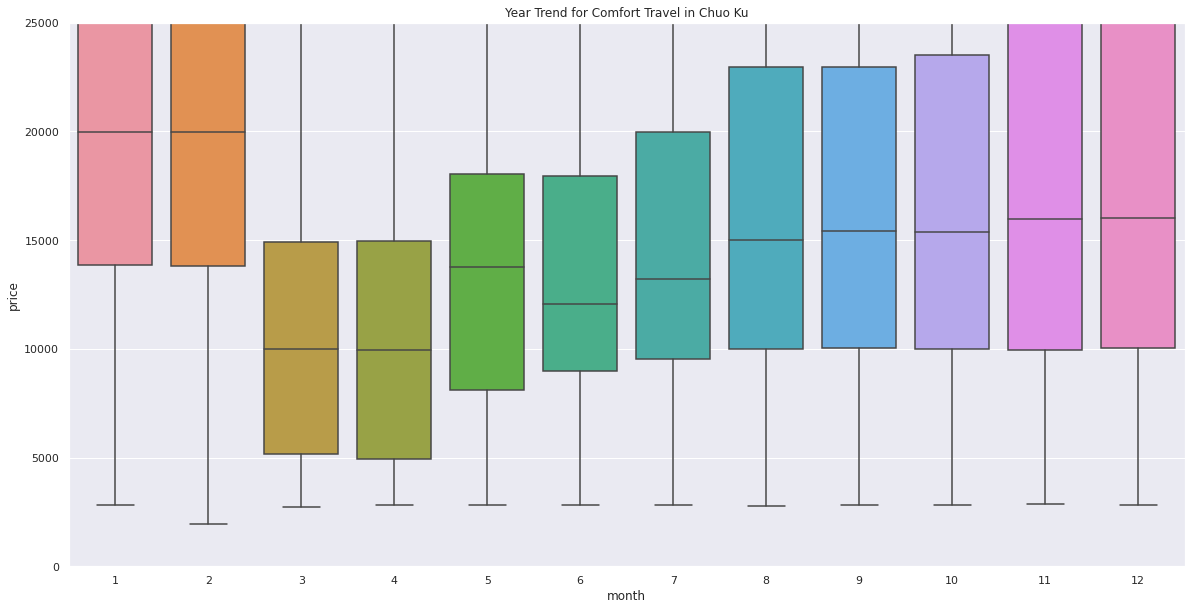

In [ ]:
# Top 3 District for Comfort Travel Month Trend 
import matplotlib.pyplot as plt

monthtrend1 = rawdata.query('room_type =="Entire home/apt"|room_type =="Private room"')
monthtrend1['month'] = pd.DatetimeIndex(monthtrend1['calendar_last_scraped']).month

# Chuo Ku
plt.figure(figsize = (20,10))
plt.ylim(0, 25000)

chuomt1 = monthtrend1.query('neighbourhood_cleansed =="Chuo Ku"')
sns.boxplot(x='month', y='price', data=chuomt1).set(title='Year Trend for Comfort Travel in Chuo Ku')



# Ota Ku

[Text(0.5, 1.0, 'Year Trend for Comfort Travel in Ota Ku')]

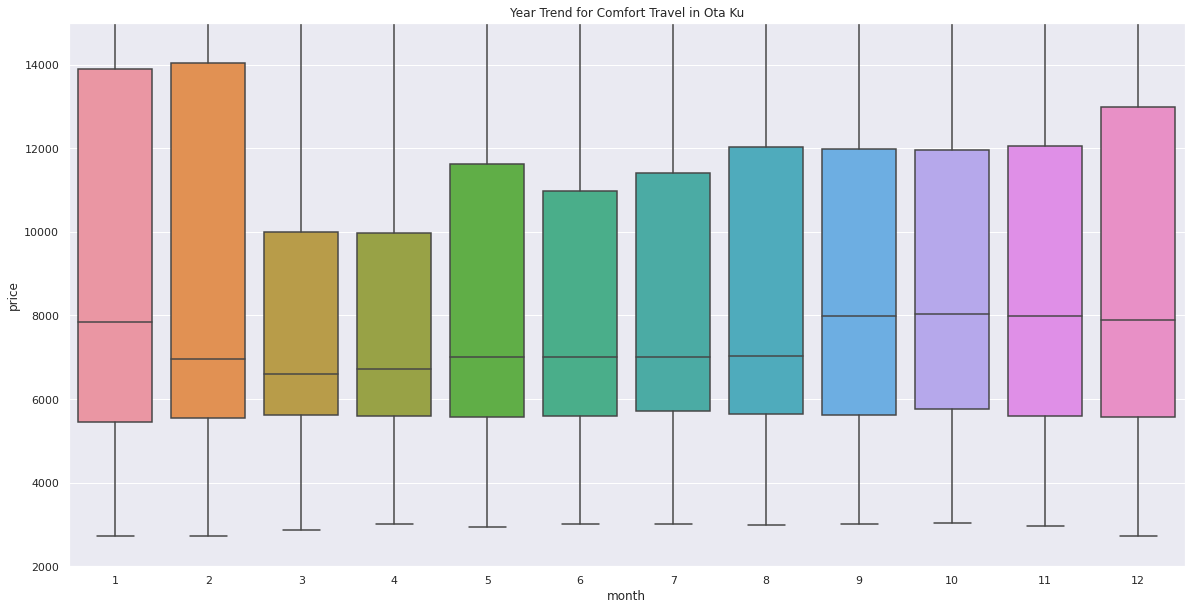

In [ ]:
# Ota Ku

plt.figure(figsize = (20,10))
plt.ylim(2000, 15000)
otamt1 = monthtrend1.query('neighbourhood_cleansed =="Ota Ku"')
sns.boxplot(x='month', y='price', data=otamt1).set(title='Year Trend for Comfort Travel in Ota Ku')

# Setagaya Ku

[Text(0.5, 1.0, 'Year Trend for Comfort Travel in Setagaya Ku')]

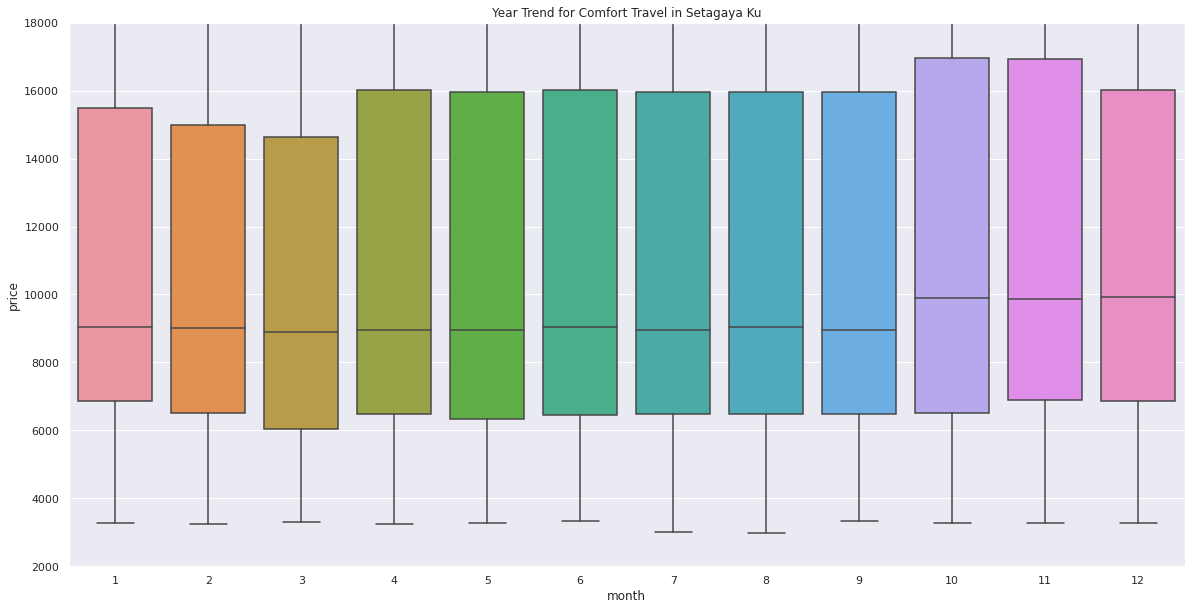

In [ ]:
# Setagaya Ku

plt.figure(figsize = (20,10))
plt.ylim(2000, 18000)
setagayamt1 = monthtrend1.query('neighbourhood_cleansed =="Setagaya Ku"')
sns.boxplot(x='month', y='price', data=setagayamt1).set(title='Year Trend for Comfort Travel in Setagaya Ku')

Budget Travel:
# Shinagawa Ku

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[Text(0.5, 1.0, 'Year Trend for Budget Travel in Shinagawa Ku')]

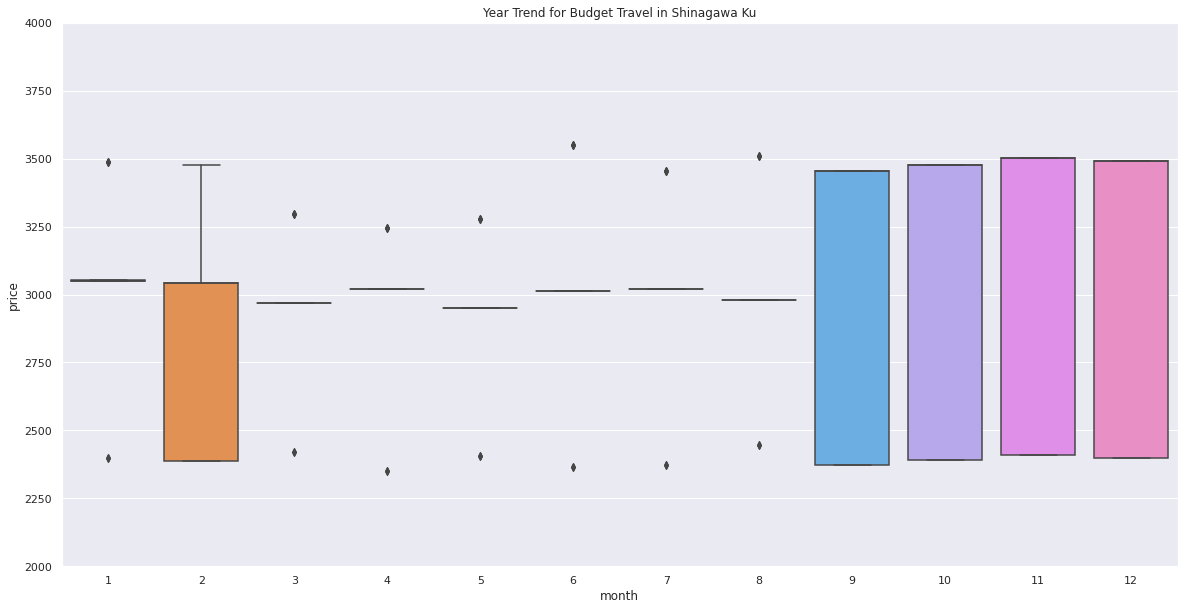

In [ ]:
# Top 3 District for Budget Travel Month Trend

monthtrend2 = rawdata.query('room_type =="Shared room"')
monthtrend2['month'] = pd.DatetimeIndex(monthtrend2['calendar_last_scraped']).month

# Shinagawa Ku
plt.figure(figsize = (20,10))
plt.ylim(2000, 4000)

chuomt2 = monthtrend2.query('neighbourhood_cleansed =="Shinagawa Ku"')
sns.boxplot(x='month', y='price', data=chuomt2).set(title='Year Trend for Budget Travel in Shinagawa Ku')

# Arakawa Ku


[Text(0.5, 1.0, 'Year Trend for Budget Travel in Arakawa Ku')]

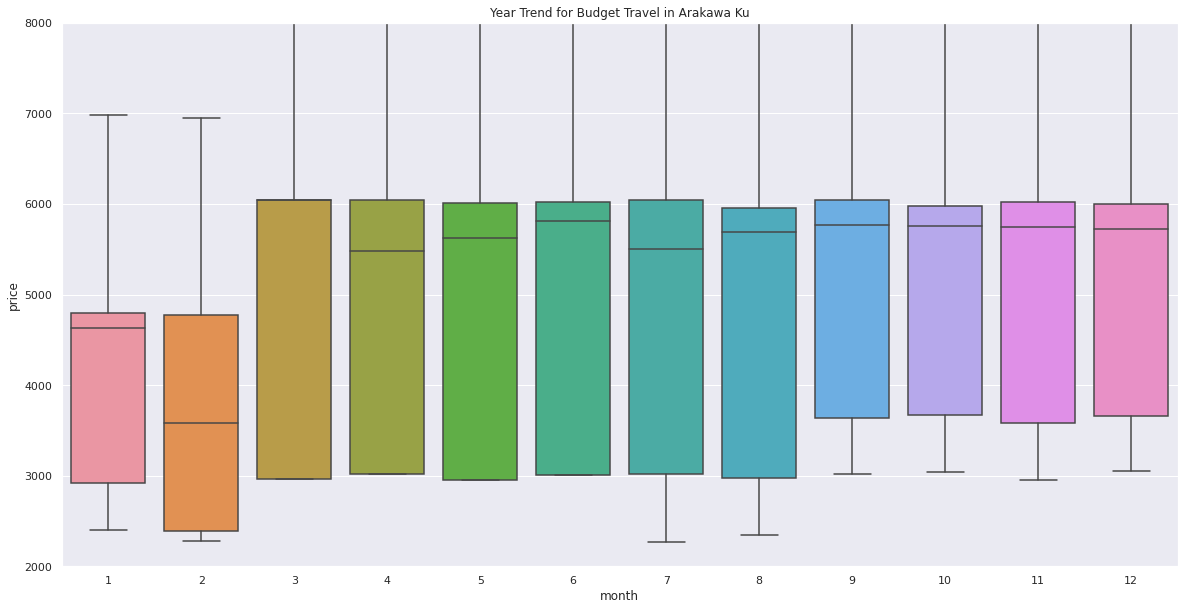

In [ ]:
# Arakawa Ku
plt.figure(figsize = (20,10))
plt.ylim(2000, 8000)

chuomt2 = monthtrend2.query('neighbourhood_cleansed =="Arakawa Ku"')
sns.boxplot(x='month', y='price', data=chuomt2).set(title='Year Trend for Budget Travel in Arakawa Ku')

# Nakano Ku


[Text(0.5, 1.0, 'Year Trend for Budget Travel in Nakano Ku')]

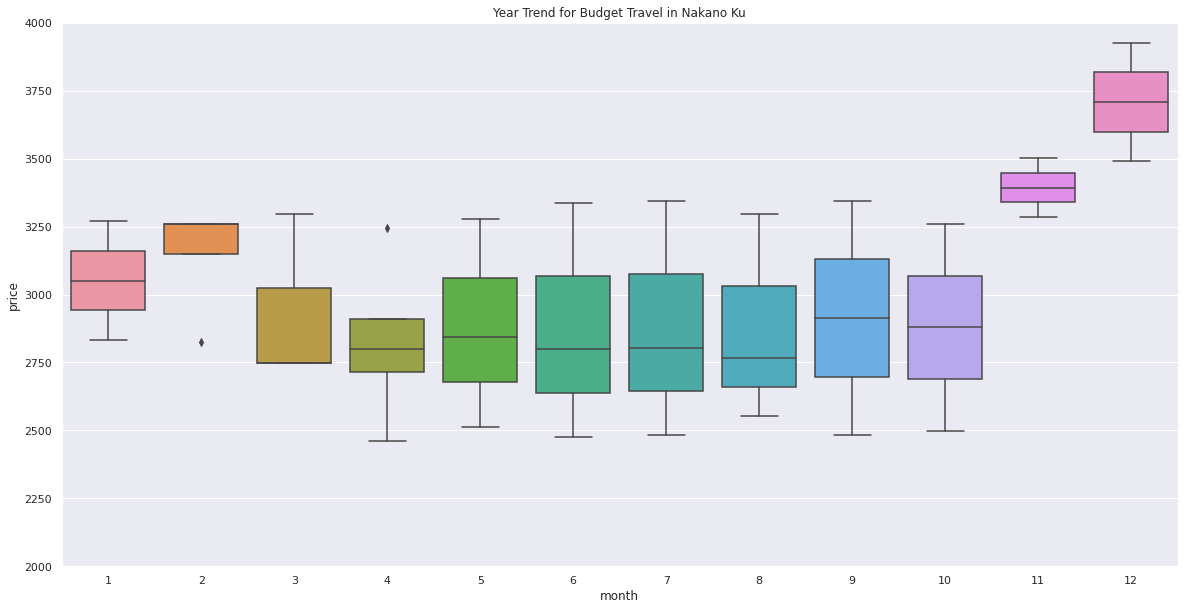

In [ ]:
# Nakano Ku
plt.figure(figsize = (20,10))
plt.ylim(2000, 4000)

chuomt2 = monthtrend2.query('neighbourhood_cleansed =="Nakano Ku"')
sns.boxplot(x='month', y='price', data=chuomt2).set(title='Year Trend for Budget Travel in Nakano Ku')

**Zipcode Section**

Each district can have many neighborhoods with unique zipcode. There might be some bad neighborhood dragging down the rating in a district. Using Zipcode to narrow down can return these neighborhoods with higher ratings. Also, the rating can be used to check the safety through Tokyo Crime Map.(Would demonstrate in powerpoint presentation)

URL: http://www2.wagmap.jp/jouhomap/PositionSelect?mid=1&nm=Crimes(Subdistrict)&ctnm=Crimes(Subdistrict)&langmode=1



Most popular Neighborhoods with great rating by Zipcode: Book for either Entire Unit or Private Room

Filter: ['Overall']  >= 95 ['Location'] >= 9.8 ['# Listings'] >= 100

The Top 10 would be selected for confirmation in crime map website.

In [ ]:
print('Top 10 Ideal Neighborhood by Zipcode for Comfort Traveler')
zipcode_pivot = rawdata.query('room_type =="Entire home/apt"|room_type =="Private room"')

zipcode_pivot = pd.pivot_table(zipcode_pivot, values = ['id','review_scores_location','review_scores_rating','review_scores_value', 'price'],
                              index=['zipcode'], aggfunc={'id':'count', 'review_scores_location':'mean','review_scores_rating':'mean','review_scores_value':'mean','price':'mean' })
zipcode_pivot = zipcode_pivot.rename(columns={'review_scores_location':'Location','review_scores_rating':'Overall','review_scores_value':'Value','id':'# Listings', 'price':'Average Price'})
zipcode_pivot = zipcode_pivot.round(1)
zipcode_pivot = zipcode_pivot[(zipcode_pivot['Overall']  >= 95) & (zipcode_pivot['Location'] >= 9.8) & (zipcode_pivot['# Listings'] >= 100)]
zipcode_pivot = zipcode_pivot.sort_values(by=['Location', 'Overall'], ascending=False)
zipcode_pivot = zipcode_pivot[['# Listings', 'Location', 'Overall', 'Average Price']]

zipcode_pivot[0:10]

Top 10 Ideal Neighborhood by Zipcode for Comfort Traveler


,# Listings,Location,Overall,Average Price
zipcode,,,,
111-0043,321,10.0,96.8,20246.7
103-0012,252,9.9,97.6,14737.9
104-0045,330,9.9,97.5,13701.7
141-0021,144,9.9,97.0,34477.7
104-0042,122,9.9,96.7,21301.5
105-0001,142,9.9,96.2,17798.2
130-0012,209,9.9,96.1,14419.9
107-0062,155,9.9,95.3,25396.4
130-0002,681,9.9,95.2,15685.5


Most popular Neighborhoods with great rating by Zipcode: Book for either Entire Unit or Private Room

Filter: ['Overall']  >= 95 ['Location'] >= 9.8 ['# Listings'] >= 100

The Top 10 would be selected for confirmation in crime map website.

In [ ]:
print('Top 10 Ideal Neighborhood by Zipcode for Budget Traveler')
zipcode_pivot2 = rawdata.query('room_type =="Shared room"')

zipcode_pivot2 = pd.pivot_table(zipcode_pivot2, values = ['id','review_scores_location','review_scores_rating','review_scores_value', 'price'],
                              index=['zipcode'], aggfunc={'id':'count', 'review_scores_location':'mean','review_scores_rating':'mean','review_scores_value':'mean','price':'mean' })
zipcode_pivot2 = zipcode_pivot2.rename(columns={'review_scores_location':'Location','review_scores_rating':'Overall','review_scores_value':'Value','id':'# Listings', 'price':'Average Price'})
zipcode_pivot2 = zipcode_pivot2.round(1)
zipcode_pivot2 = zipcode_pivot2[(zipcode_pivot2['Overall']  >= 95) & (zipcode_pivot2['Location'] >= 9.5) & (zipcode_pivot2['# Listings'] >= 25)]
zipcode_pivot2 = zipcode_pivot2.sort_values(by=['Location', 'Overall'], ascending=False)
zipcode_pivot2 = zipcode_pivot2[['# Listings', 'Location', 'Overall', 'Average Price']]

zipcode_pivot2[0:10]

Top 10 Ideal Neighborhood by Zipcode for Budget Traveler


,# Listings,Location,Overall,Average Price
zipcode,,,,
142-0064,36,10.0,97.9,3435.2
144-0033,39,10.0,96.0,6177.8
155-0031,45,10.0,95.8,4426.4
160-0006,55,10.0,95.4,3341.2
111-0051,87,9.8,97.8,5789.2
111-0035,60,9.8,96.0,3924.5
171-0031,48,9.8,95.5,3490.4
130-0005,198,9.7,96.5,1815.6
131-0045,32,9.6,98.1,4625.5


*Web Scrapping*

Web Scrapping for Top 8 Places to visit in Tokyo. To retrieve the zipcode of these 8 locations.


In [ ]:
import requests
url = 'https://livejapan.com/en/article-a0001773/'
response = requests.get(url)
if(response.ok):
  data = response.text

from bs4 import BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

entire = soup.find_all('span', class_='c-list__content --nowrap')
for question in entire[0:8]:
  locations = question.select_one('div > a').get_text()
  zipcode = question.select_one('div > ul > li > span.c-list__description ').get_text()
  zipcodes = zipcode.split()[-3]
  placezip = [locations, zipcodes]
  print(placezip)


['Tsukiji Outer Market', '104-0045']
['The Imperial Palace', '100-8111']
['Akihabara Junk Street', '101-0021']
['Senso-ji Temple', '111-0032']
['Hachiko Statue', '150-0043']
['Meiji Jingu', '151-8557']
['Yebisu Beer Memorial Hall', '150-8522']
['Roppongi Hills', '106-6108']


Only 4 zipcodes located in Top 8 tourist place are in the listing for comfort traveler.

In [ ]:
print('Available Neighborhoods with Zipcode of Top 8 Tourist Place for Comfort Travel')
zipcodes_pivot = rawdata.query('zipcode =="104-0045"|zipcode =="100-8111"|zipcode =="101-0021"|zipcode =="111-0032"|zipcode =="150-0043"|zipcode =="151-8557"|zipcode =="150-8522"|zipcode =="106-6108"')
zipcodes_pivot = zipcodes_pivot.query('room_type =="Entire home/apt"|room_type =="Private room"')
zipcodes_pivot = pd.pivot_table(zipcodes_pivot, values = ['id','review_scores_location','review_scores_rating','review_scores_value', 'price'],
                              index=['zipcode'], aggfunc={'id':'count', 'review_scores_location':'mean','review_scores_rating':'mean','review_scores_value':'mean','price':'mean' })
zipcodes_pivot = zipcodes_pivot.rename(columns={'review_scores_location':'Location','review_scores_rating':'Overall','review_scores_value':'Value','id':'# Listings', 'price':'Average Price'})
zipcodes_pivot = zipcodes_pivot.round(1)
zipcodes_pivot = zipcodes_pivot.sort_values(by=['Location', 'Overall'], ascending=False)
zipcodes_pivot = zipcodes_pivot[['# Listings', 'Location', 'Overall', 'Average Price']]

zipcodes_pivot

Available Neighborhoods with Zipcode of Top 8 Tourist Place for Comfort Travel


,# Listings,Location,Overall,Average Price
zipcode,,,,
104-0045,330,9.9,97.5,13701.7
101-0021,155,9.9,94.9,19795.7
150-0043,1546,9.9,94.6,17302.2
111-0032,1814,9.3,92.9,18074.2


Only 2 availble, it is negligible, don't need to put in powerpoint.

In [ ]:
print('Available Neighborhoods with Zipcode of Top 8 Tourist Place for Budget Travel')
zipcodes_pivot1 = rawdata.query('zipcode =="104-0045"|zipcode =="100-8111"|zipcode =="101-0021"|zipcode =="111-0032"|zipcode =="150-0043"|zipcode =="151-8557"|zipcode =="150-8522"|zipcode =="106-6108"')
zipcodes_pivot1 = zipcodes_pivot1.query('room_type =="Shared room"')
zipcodes_pivot1 = pd.pivot_table(zipcodes_pivot1, values = ['id','review_scores_location','review_scores_rating','review_scores_value', 'price'],
                              index=['zipcode'], aggfunc={'id':'count', 'review_scores_location':'mean','review_scores_rating':'mean','review_scores_value':'mean','price':'mean' })
zipcodes_pivot1 = zipcodes_pivot1.rename(columns={'review_scores_location':'Location','review_scores_rating':'Overall','review_scores_value':'Value','id':'# Listings', 'price':'Average Price'})
zipcodes_pivot1 = zipcodes_pivot1.round(1)
zipcodes_pivot1 = zipcodes_pivot1.sort_values(by=['Location', 'Overall'], ascending=False)
zipcodes_pivot1 = zipcodes_pivot1[['# Listings', 'Location', 'Overall', 'Average Price']]

zipcodes_pivot1

Available Neighborhoods with Zipcode of Top 8 Tourist Place for Budget Travel


,# Listings,Location,Overall,Average Price
zipcode,,,,
101-0021,9,9.9,97.1,1539.0
111-0032,168,9.7,90.6,3297.2


**Host Section**

Best Host in all Tokyo (Top 20) with perfect communication and overall rating (99% in case of outlier)

Those best host would receive most reviews as they are so popular that many tourists would end with living in their place.

In [ ]:
print('Customers can feel free to book the accommandation with these hosts with ZERO worry')

besthost_pivot = pd.pivot_table(rawdata, values = ['review_scores_rating','review_scores_communication', 'reviews_per_month'],
                              index=['host_id'], aggfunc=np.mean)
besthost_pivot = besthost_pivot.rename(columns={'review_scores_rating':'Overall','review_scores_communication':'Communication','reviews_per_month':'# Monthly Review'})

besthost_pivot = besthost_pivot.round(1)
besthost_pivot = besthost_pivot[(besthost_pivot['Overall']  >= 99) & (besthost_pivot['Communication'] >= 9.9)]

besthost_pivot = besthost_pivot.sort_values(by=['# Monthly Review', 'Overall'], ascending=False)
besthost_pivot = besthost_pivot[['# Monthly Review','Overall', 'Communication']]
besthost_pivot[0:20]

Customers can feel free to book the accommandation with these hosts with ZERO worry


,# Monthly Review,Overall,Communication
host_id,,,
307553533,9.2,99.0,10.0
263773411,9.0,100.0,10.0
307091960,8.5,99.3,10.0
245921103,7.4,99.1,10.0
21004633,7.1,99.2,10.0
317903930,6.3,100.0,10.0
49376551,6.2,100.0,10.0
196974522,5.9,99.8,10.0
305651516,5.9,99.7,10.0


**Correlation Section**

Correlation of Price and different numerical driving factors:

In [ ]:
correlation = rawdata[['price', 'bathrooms','bedrooms','beds','guests_included','extra_people','review_scores_rating']].corr()
print(correlation)


                         price  bathrooms  ...  extra_people  review_scores_rating
price                 1.000000   0.017509  ...      0.093547              0.009951
bathrooms             0.017509   1.000000  ...      0.067303             -0.000387
bedrooms              0.095647   0.346804  ...      0.243454              0.026589
beds                  0.085017   0.385946  ...      0.241720              0.040600
guests_included       0.129867   0.122695  ...      0.248464              0.043210
extra_people          0.093547   0.067303  ...      1.000000              0.083771
review_scores_rating  0.009951  -0.000387  ...      0.083771              1.000000

[7 rows x 7 columns]


It shows that there is trivial relationship between price and the room features, as well as the review score.
Therefore, it is important to focus on the district/neighborhood and room_type as driving factors demostrated above.

**T-Test Section**

By the rule of 95%, if the p-value is lower than 0.05, there is significant impact. 

Null Hypothesis 1: Cancellation policy would not significantly impact the price. (Strict vs Moderate/Flexible)


In [ ]:
from scipy import stats

strict = rawdata.iloc[(rawdata['cancellation_policy']=='strict_14_with_grace_period').values]
flex = rawdata.iloc[(rawdata['cancellation_policy']=='moderate').values | (rawdata['cancellation_policy']=='flexible').values]
stats.ttest_ind(strict['price'], flex['price'])

Ttest_indResult(statistic=21.422792628263956, pvalue=1.3203083555930016e-101)

Null Hypothesis 2: Whether the host is a superhost would not significantly impact the price. (Yes or No)


In [ ]:
supert = rawdata.iloc[(rawdata['host_is_superhost']=='t').values]
superf = rawdata.iloc[(rawdata['host_is_superhost']=='f').values]
stats.ttest_ind(supert['price'], superf['price'])

Ttest_indResult(statistic=-0.26889204098210845, pvalue=0.7880132635213387)

From the T-Test of these 2 hypothesis, it shows that the cancellation policy would significantly impact the listing price. But whether the host is a superhost doesn't. 